In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
naList = pd.DataFrame()
naList['missing_num'] = df.isnull().sum().sort_values(ascending = False)
naList['missing_%'] = (naList['missing_num'] / df.shape[0] * 100).round(1)

naList = naList.loc[naList['missing_num'] != 0]
naList

,missing_num,missing_%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


array([<AxesSubplot: title={'center': 'surv total'}>], dtype=object)

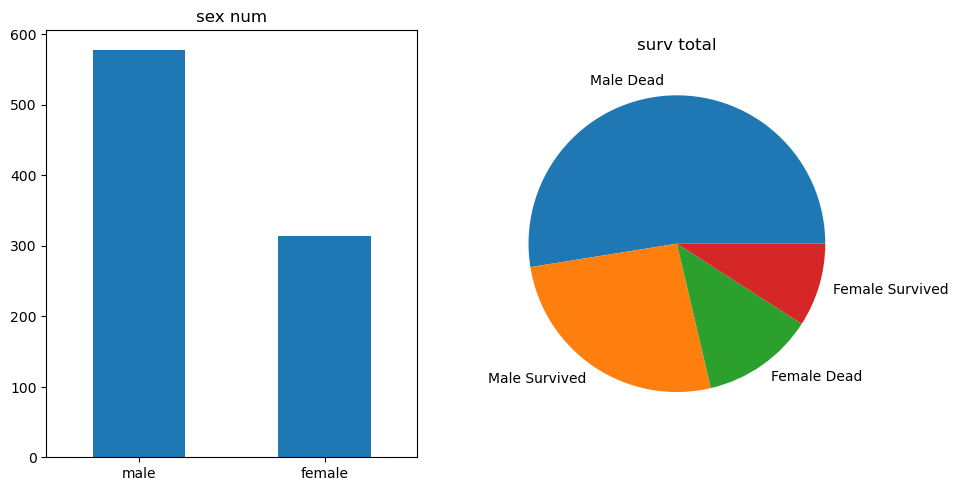

In [31]:
plt.subplots_adjust(right=1.4, top=1)

plt.subplot(1, 2, 1)
plt.title('sex num')

df['Sex'].value_counts().plot.bar(rot=0)

plt.subplot(1, 2, 2)
plt.title('surv total')

labels = {
    'Male Dead': '(male, 0)',
    'Male Survived': '(male, 1)',
    'Female Dead': '(female, 0)',
    'Female Survived': '(female, 1)'
}

df[['Sex', 'Survived']].value_counts().plot.pie(subplots=True, labels=labels)

<AxesSubplot: title={'center': 'age surv list'}>

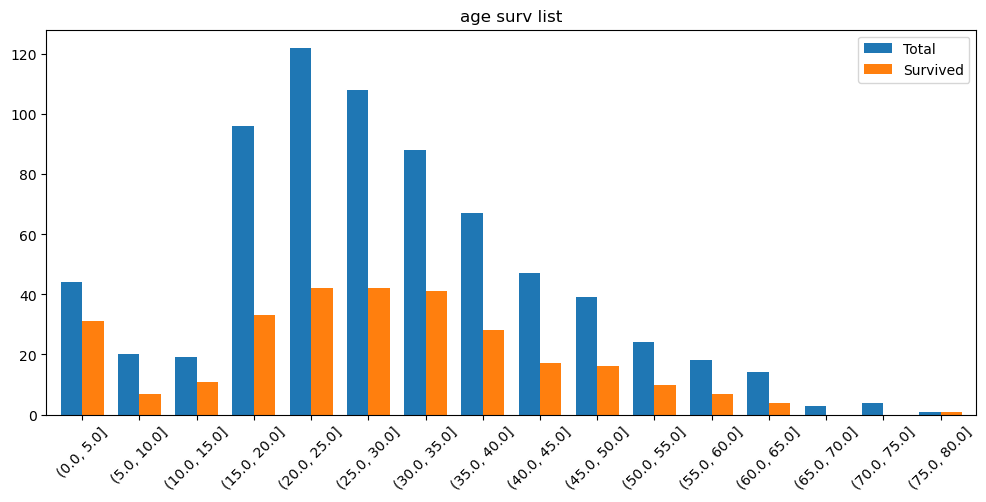

In [56]:
df['AgeCTGR'] = pd.cut(df['Age'], bins=np.arange(0,df['Age'].max()+1,5))

ageData = pd.DataFrame()
ageData['Total'] = df['AgeCTGR'].value_counts().sort_index()
ageData['Survived'] = df.loc[df['Survived']==1]['AgeCTGR'].value_counts().sort_index()

ageData.plot.bar(width=0.75, rot=45, figsize=(12, 5), title='age surv list')

<AxesSubplot: title={'center': 'age nan (dead)'}, ylabel='Sex'>

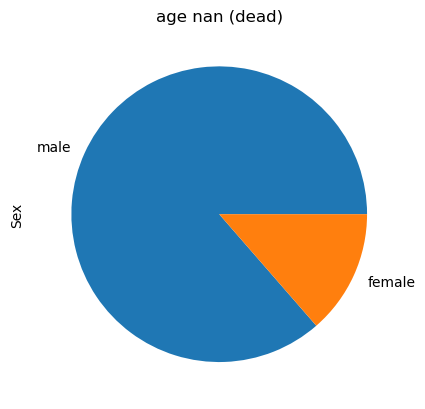

In [57]:
df[df['Age'].isna()].loc[df['Survived']==0]['Sex'].value_counts().plot.pie(title='age nan (dead)')

<AxesSubplot: title={'center': 'Pclass 3 dead'}>

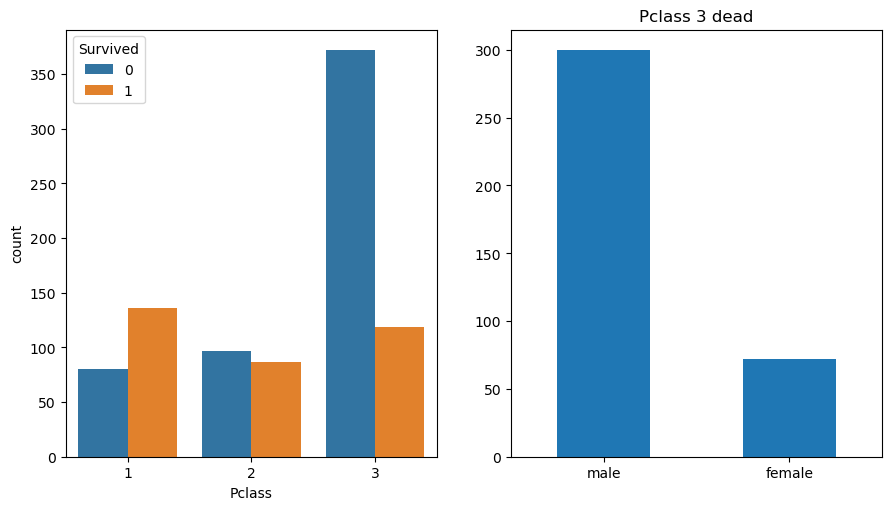

In [76]:
import seaborn as sns

plt.subplots_adjust(right=1.4, top=1)

plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)

plt.subplot(1, 2, 2)
df.loc[df['Pclass']==3].loc[df['Survived']==0]['Sex'].value_counts().plot.bar(title='Pclass 3 dead', rot=0)